In [97]:
import pandas as pd
import warnings 
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [98]:
# to see all row and column
pd.set_option('display.max_row',111)
pd.set_option('display.max_column',111)

In [100]:
data = pd.read_csv('LP1_startup_funding2020.csv')
data.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,NaN,NaN
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,NaN
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,NaN
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,NaN,NaN
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,NaN,NaN


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [102]:
data.shape

(1055, 10)

In [103]:
# type of variable : 8 quantitatif ,2 qualitatif
data.dtypes.value_counts()

object     8
float64    2
Name: count, dtype: int64

In [104]:
# here we can see data NaN
df = data.isna()
df.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,True,False,True
3,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,True,True


<Axes: >

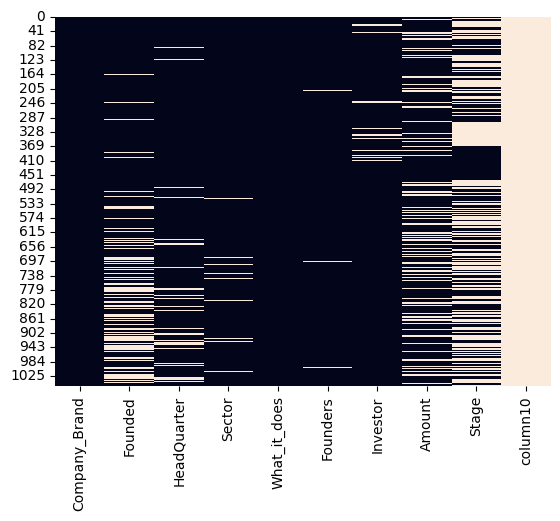

In [105]:
# To get an overview of the columns that have more NaN values which seaborn heatmap
sns.heatmap(df,cbar=False)

In [116]:
# we calculate the percentage of missing values
# Analyse missing value : we are :
# 99% missing value on column10 ,
# 43% missing values stage 
# ,24% for amount 
# 20% for Founded 
# 8% to HeadQuarter 
# 3% Investor 
# 1% on Sector and Founders
(df.sum()/data.shape[0]).sort_values(ascending=True) 

Company_Brand    0.000000
What_it_does     0.000000
Founders         0.011374
Sector           0.012322
Investor         0.036019
HeadQuarter      0.089100
Founded          0.201896
Amount           0.240758
Stage            0.439810
column10         0.998104
dtype: float64

In [117]:
# we can see the total of missing value per columns
df.sum()

Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
dtype: int64

In [119]:
# we can delete all column useless :column tha have missing value around 90%
df1= data[data.columns[data.isna().sum()/data.shape[0] <0.9]]

In [120]:
df1.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,NaN
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,NaN
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,NaN


In [121]:
# Now we can see at the new data the missing values
df4 = df1.isna()

<Axes: >

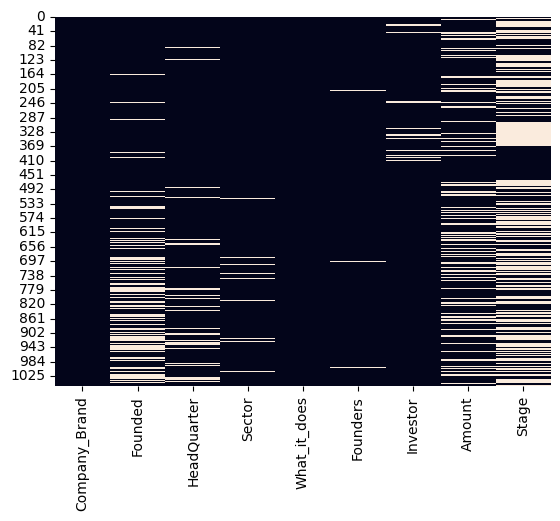

In [122]:
sns.heatmap(df4,cbar=False)

In [123]:
# we can drop missing value and see thte dimension
df_4 = df1.dropna()

In [124]:
df_4.shape

(348, 9)

In [125]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 348 entries, 1 to 1054
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  348 non-null    object 
 1   Founded        348 non-null    float64
 2   HeadQuarter    348 non-null    object 
 3   Sector         348 non-null    object 
 4   What_it_does   348 non-null    object 
 5   Founders       348 non-null    object 
 6   Investor       348 non-null    object 
 7   Amount         348 non-null    float64
 8   Stage          348 non-null    object 
dtypes: float64(2), object(7)
memory usage: 27.2+ KB


In [126]:
(df_4.isna().sum()/data.shape[0]).sort_values(ascending=True)

Company_Brand    0.0
Founded          0.0
HeadQuarter      0.0
Sector           0.0
What_it_does     0.0
Founders         0.0
Investor         0.0
Amount           0.0
Stage            0.0
dtype: float64

In [127]:
df_4.dtypes.value_counts()

object     7
float64    2
Name: count, dtype: int64

<Axes: ylabel='count'>

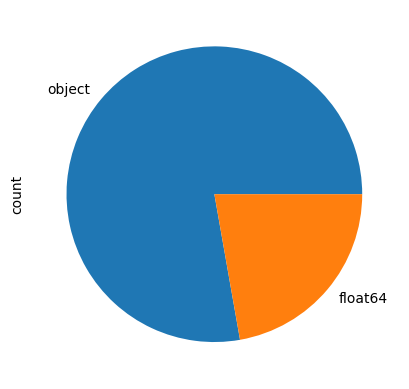

In [130]:
# Two type variables  : qualitatives 30,quantitative :70
df_4.dtypes.value_counts().plot.pie()

<Axes: >

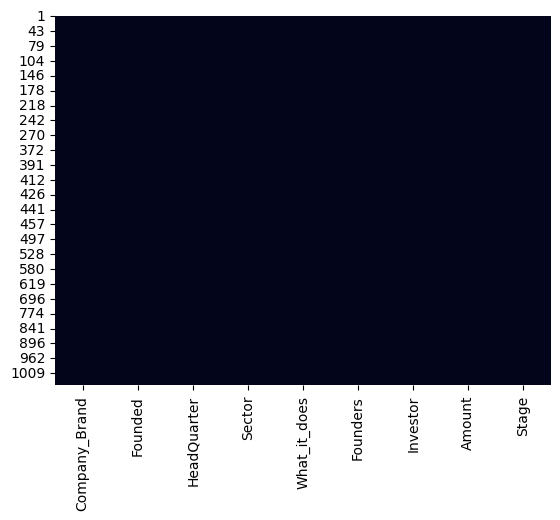

In [96]:
sns.heatmap(df_4.isna(),cbar=False)